# Basic R Only

In [1]:
conn<-file("random_plotting.R")
writeLines("#unlock for running in SageMathCell 
#%%r
#svg(filename='Rplots.svg',onefile=T,width=10,height=10,
#    pointsize=12,family='times',bg='whitesmoke',
#    antialias=c('default','none','gray','subpixel'))
options(repr.plot.width=10,repr.plot.height=10,
        repr.plot.bg='whitesmoke')
a<-.01*sample(30:99,1); b<-.01*sample(30:99,1)
c<-.01*sample(30:99,1); d<-max(a,2*b,3*c)
cat(c('a =',a,'b =',b,'c =',c,'\n'))
n=sample(5:10,1); w=144; c0<-'slategray'
coli<-function(){rgb(runif(1),runif(1),runif(1))}
t1<-seq(0,8.95*pi,len=w*n)
x1<-sin(1.9*t1)*cos(t1); y1<-sin(1.9*t1)*sin(t1)
t2<-seq(0,12.18*pi,len=w*n)
x2<-2*sin(2.3*t2)*cos(t2); y2<-2*sin(2.3*t2)*sin(t2)
t3<-seq(0,11.77*pi,len=w*n)
x3<-3*sin(1.7*t3)*cos(t3); y3<-3*sin(1.7*t3)*sin(t3)
plot(a*x1,a*y1,type='o',pch=sample(0:18,1),cex=.1,
     col=coli(),lwd=1,xlab='',ylab='',
     xlim=c(-d,d),ylim=c(-d,d)); par(new=TRUE)
plot(b*x2,b*y2,type='o',pch=sample(0:18,1),cex=.2,
     col=coli(),lwd=1,xlab='',ylab='',
     xlim=c(-d,d),ylim=c(-d,d)); par(new=TRUE)
plot(c*x3,c*y3,type='o',pch=sample(0:18,1),cex=.3,
     col=coli(),lwd=1,xlim=c(-d,d),ylim=c(-d,d),
     xlab='x',ylab='y',fg=c0,col.axis=c0,col.lab=c0)
grid(col=c0)
#dev.off()",conn)

a = 0.52 b = 0.39 c = 0.67 


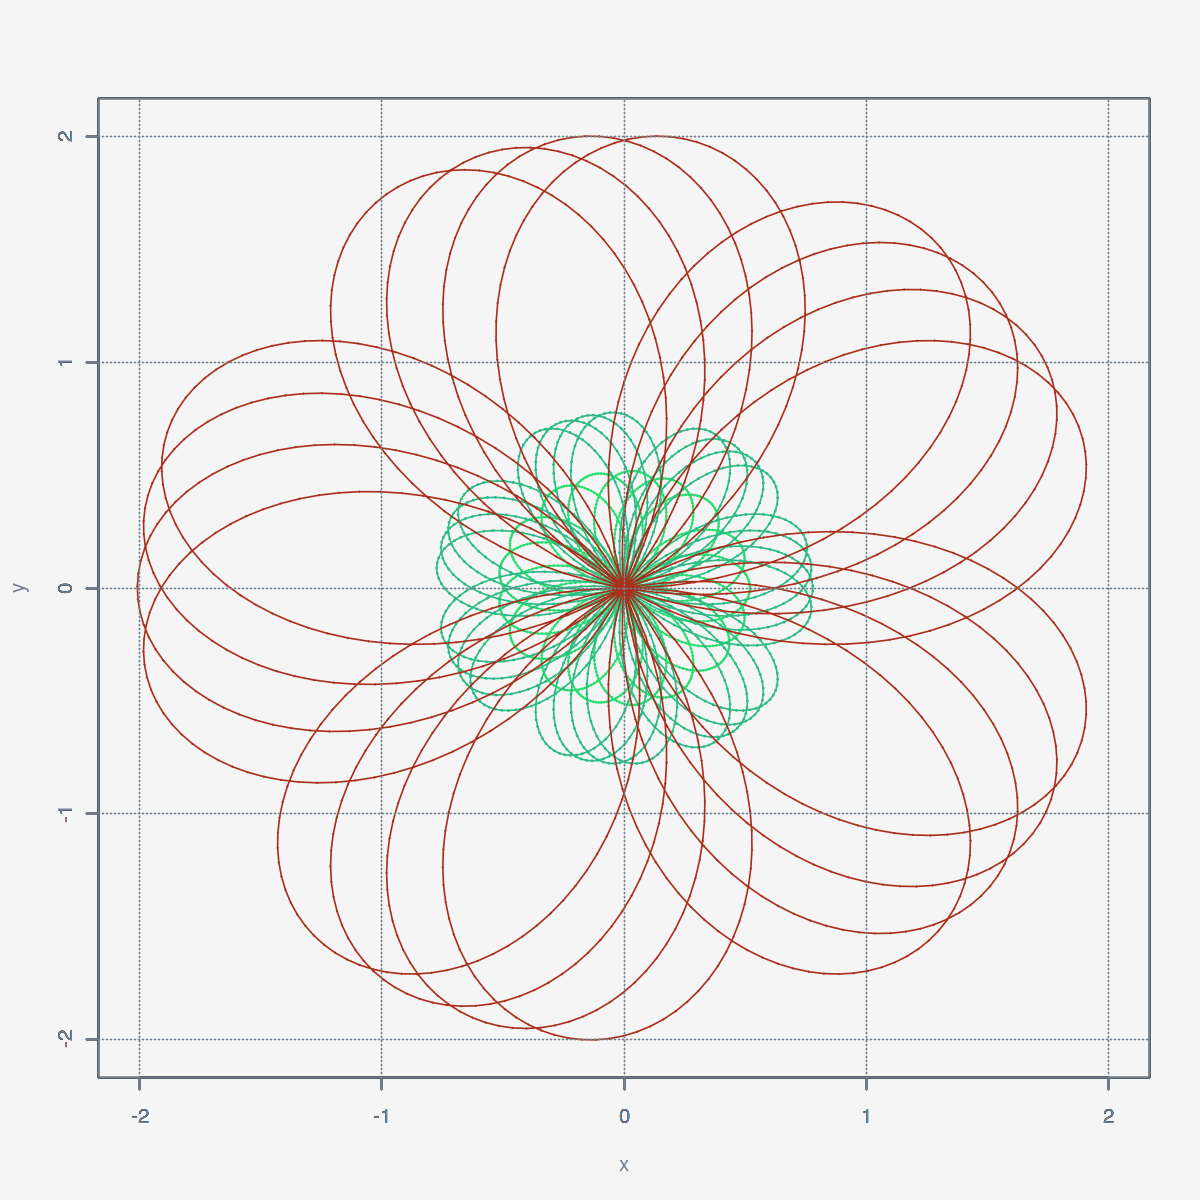

In [2]:
source('random_plotting.R')

# Python & R

In [3]:
conn<-file("rpy_modules.R")
writeLines("library(IRdisplay)
library(reticulate); library(keras)
library(imager); library(ggplot2); library(reshape2)
pl<-c('matplotlib','seaborn','pandas','networkx',
      'tensorflow','sklearn','h5py')
for (p in pl) {py_install(p)} 
np<-import('numpy'); pd<-import('pandas')
pl<-import('pylab'); sn<-import('seaborn')
sl<-import('sklearn'); tf<-import('tensorflow')
h5<-import('h5py'); nx<-import('networkx')",conn)

In [4]:
source('rpy_modules.R')

Loading required package: magrittr


Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following object is masked from ‘package:IRdisplay’:

    display


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following object is masked from ‘package:base’:

    save.image




Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...
Using virtual environment '/usr/local/share/.virtualenvs/r-reticulate' ...


In [5]:
conn<-file("pd_csv_plot.R")
writeLines("
options(repr.plot.width=10,repr.plot.height=5,
        repr.plot.bg='whitesmoke')
pd_csv_matplot<-function(url,startcol,endcol)
    {df<-pd$read_csv(url); df<-df[,startcol:endcol]
     matplot(1:440,df,type='l')}
pd_csv_ggplot<-function(url,startcol,endcol,palette)
    {df<-pd$read_csv(url); df<-df[,startcol:endcol]
     df$N<-1:dim(df)[1]; df<-melt(df,id.vars='N')
     ggplot(df,aes(N,value,fill=variable))+geom_area()+
     scale_fill_brewer(palette=palette)+theme_bw()}
",conn)

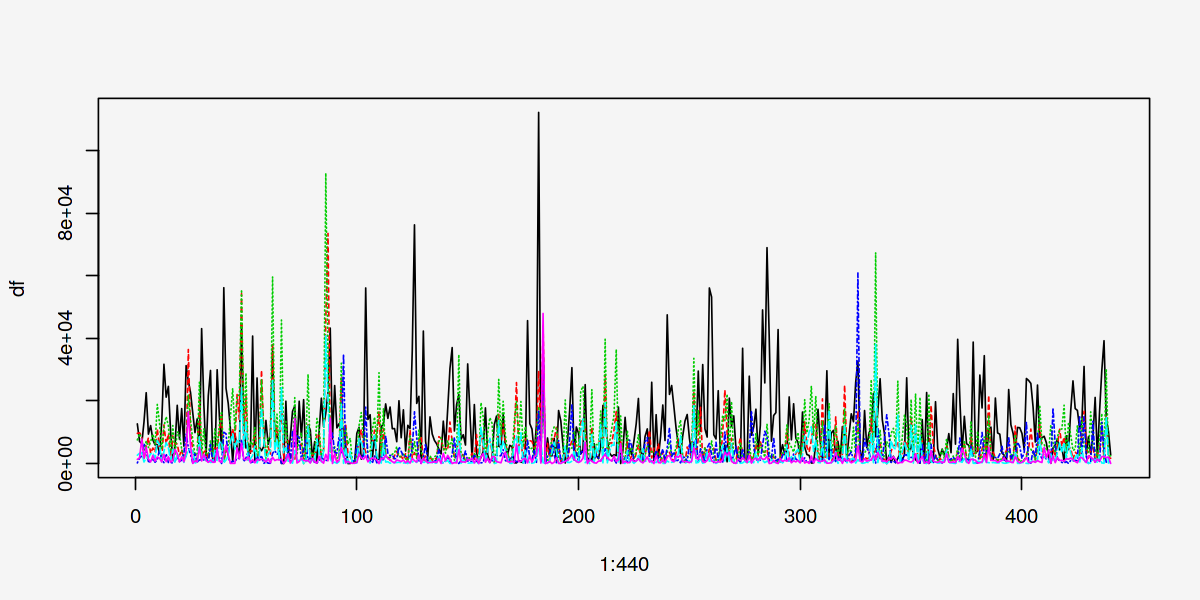

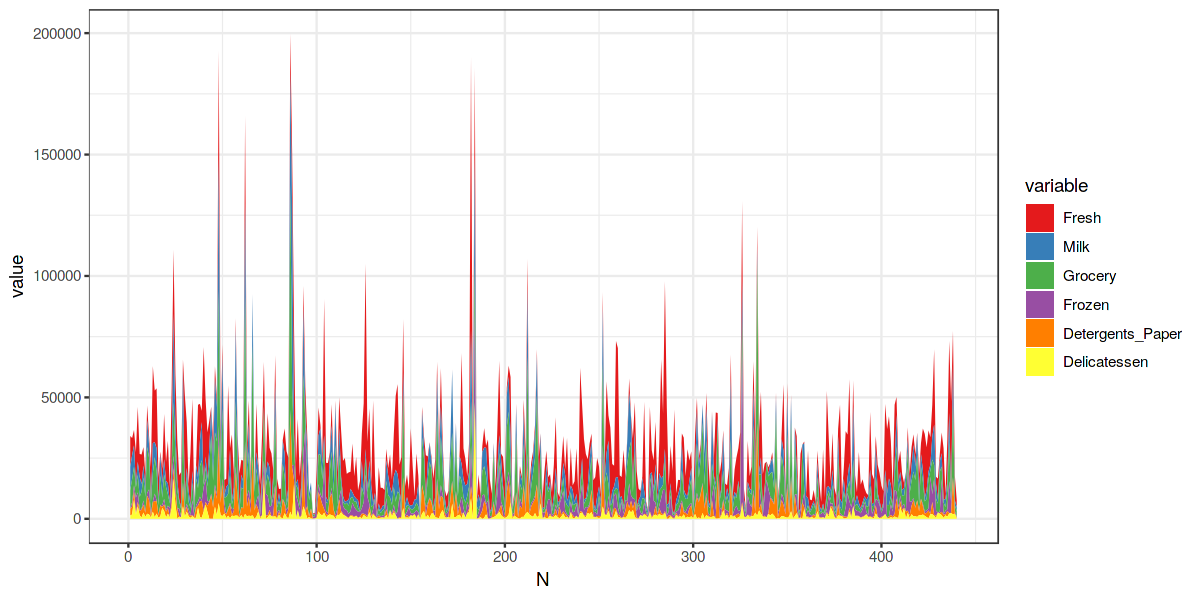

In [6]:
source('pd_csv_plot.R')
str<-c('https://raw.githubusercontent.com/OlgaBelitskaya/',
       'machine_learning_engineer_nd009/master/',
       'Machine_Learning_Engineer_ND_P3/customers.csv')
url<-paste(str,collapse='')
startcol<-3; endcol<-8; palette<-'Set1'
pd_csv_matplot(url,startcol,endcol)
pd_csv_ggplot(url,startcol,endcol,palette)

In [7]:
conn<-file("networkx_multidigraph_pyplot.R")
writeLines("
networkx_graphplot<-
function(edge_list,sfig,sarrow,snode,sfont)
    {g<-nx$MultiDiGraph()
     pl$figure(figsize=c(sfig,sfig))
     g$add_edges_from(edge_list)
     pos<-nx$shell_layout(g)
     nx$draw_networkx_edges(
         g,pos,width=3,edge_color='silver',
         alpha=.5,arrowsize=sarrow,arrowstyle='-|>')
     nx$draw_networkx_nodes(
         g,pos,node_size=snode,alpha=.7,
         node_color='steelblue',node_shape='h')
     nx$draw_networkx_labels(
         g,pos,font_size=sfont,font_weight='bold')
     pl$axis('off')
     pl$title('MultiDiGraph & Pyplot in R')
     file_name<-paste0('rpy_multidigraph_plot',
                       sample(1:9999999,1),'.png')
     pl$savefig(file_name)
     im<-load.image(file_name)
     options(repr.plot.width=sfig,repr.plot.height=sfig)
     par(mar=c(0,0,0,0)); plot(im,axes=FALSE)}
",conn)

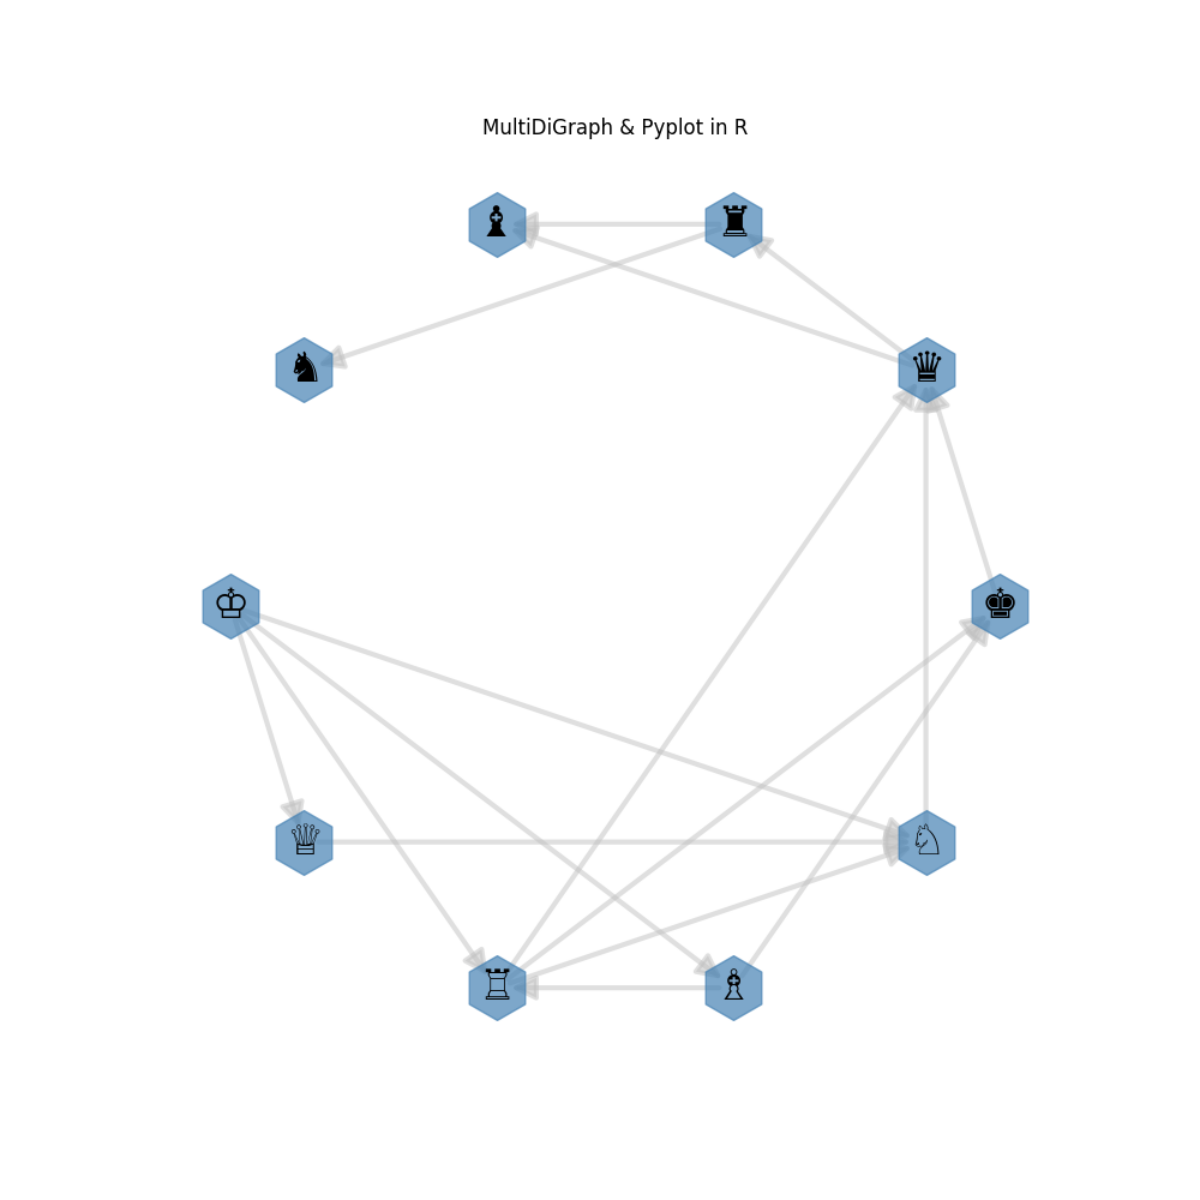

In [8]:
source("networkx_multidigraph_pyplot.R")
edge_list<-list(c('♔','♕'),c('♔','♖'),c('♔','♗'),
                c('♔','♘'),c('♕','♘'),c('♖','♘'),
                c('♖','♚'),c('♖','♛'),c('♗','♖'),
                c('♗','♚'),c('♘','♛'),c('♚','♛'),
                c('♛','♜'),c('♛','♝'),c('♜','♝'),
                c('♜','♞'))
sfig<-10; sarroow<-30; snode<-1500; sfont<-25
networkx_graphplot(edge_list,sfig,sarroow,snode,sfont)

# JavaScript & HTML & R

In [9]:
conn<-file('embedding_html.R')
writeLines("
embedding_html_string<-
function(html_str,width,height)
    {html_str<-paste(
         as.character(html_str),collapse='\n')
     randi<-sample(1:9999999,1)
     file_name<-paste0('chart',randi,'.html')
     write.table(html_str,file=file_name,quote=FALSE,
                 col.names=FALSE,row.names=FALSE)
     str<-paste0('<div id=\x22',randi,
            '\x22><iframe src=\x22chart',randi,
            '.html\x22 height=',height,
            ' width=',width,'>','</iframe></div>')
     display_html(str)}
embedding_html_page<-
function(file_path,width,height)
    {html_str<-paste(
         readLines(file_path,warn=FALSE),collapse='\n')
     randi<-sample(1:9999999,1)
     file_name<-paste0('chart',randi,'.html')
     write.table(html_str,file=file_name,quote=FALSE,
                 col.names=FALSE,row.names=FALSE)
     str<-paste0('<div id=\x22',randi,
                 '\x22><iframe src=\x22chart',randi,
                 '.html\x22 height=',height,
                 ' width=',width,'>','</iframe></div>')
     display_html(str)}
",conn)

In [10]:
source("embedding_html.R")

In [11]:
html_str<-"
<script type='text/javascript' 
        src='https://www.gstatic.com/charts/loader.js'>
</script>
<div id='gchart' style='width:600px; height:600px;'>
</div><script>
function get_int(xmin,xmax) {
    return Math.floor(Math.random()*(xmax-xmin+1))+xmin;};
function get_color(k) {
    return '#00'+get_int(10*k,255).toString(16)+
           get_int(10*k,255).toString(16);};
function fx(a,b,c,q,n,t,k) {
    var x1=Math.cos(Math.PI*t/n+k*Math.PI/q),
        x2=Math.cos(a*Math.PI*t/n+k*Math.PI/q),
        x3=Math.cos(b*Math.PI*t/n+k*Math.PI/q),
        x4=Math.cos(c*Math.PI*t/n+k*Math.PI/q);
    return x1+x2+x3+x4};
function fy(a,b,c,q,n,t,k) {
    var y1=Math.sin(Math.PI*t/n+k*Math.PI/q),
        y2=Math.sin(a*Math.PI*t/n+k*Math.PI/q),
        y3=Math.sin(b*Math.PI*t/n+k*Math.PI/q),
        y4=Math.sin(c*Math.PI*t/n+k*Math.PI/q);
    return y1+y2+y3+y4};
function ar(a,b,c,q,n,k) {
    return Array(2*n+1).fill(k).map((k,t)=>
           [fx(a,b,c,q,n,t,k),fy(a,b,c,q,n,t,k)]);};
google.charts.load('current',{'packages':['corechart']}); 
google.charts.setOnLoadCallback(drawChart);
function drawChart() {
    var a=get_int(5,9),b=get_int(10,14),
        c=get_int(15,19),q=get_int(3,6),n=get_int(4,16); 
    var xy=ar(a,b,c,q,n,1); 
    xy.unshift(['x',[a,b,c,q,n].toString()]); 
    for (var k=2; k<2*q+2; k++) {xy=xy.concat(ar(a,b,c,q,n,k));};
    var data=google.visualization.arrayToDataTable(xy); 
    var options={chartArea:{left:0,top:0,right:0,bottom:20},
                 legend:{position:'bottom'},curveType:'none',
                 lineWidth:1,pointSize:3,colors:[get_color(a)],
                 hAxis:{textColor:'#fff'},vAxis:{textColor:'#fff'}};
    var chart=new google.visualization
                        .LineChart(document.getElementById('gchart')); 
    chart.draw(data,options);};
</script>"
embedding_html_string(html_str,620,650)

In [12]:
html_str<-"
<style>
.point1, .point2 {stroke:#fff; stroke-width:1;}
.grid1 line, .grid1 path {stroke:#fff; stroke-opacity:.9; 
                          shape-rendering:crispEdges;} 
</style>
<script src='https://d3js.org/d3.v5.min.js'></script>
<svg id='d3chart' style='background-color:slategray;'></svg>
<script>
var n=630,m0=35,m={top:m0,right:m0,bottom:m0,left:m0},
    w=600-m.left-m.right,h=600-m.top-m.bottom; 
var xScale=d3.scaleLinear().domain([-3,3]).range([0,w]), 
    yScale=d3.scaleLinear().domain([-3,3]).range([h,0]);
function make_x_gridlines() {
    return d3.axisBottom(xScale).ticks(11)}; 
function make_y_gridlines() {
    return d3.axisLeft(yScale).ticks(11)};
var svg=d3.select('#d3chart')
          .attr('width',w+m.left+m.right)
          .attr('height',h+m.top+m.bottom)
          .append('g')
          .attr('transform','translate('+m.left+','+m.top+')');
svg.append('g').attr('class','grid1')
   .attr('transform','translate(0,'+h+')')
   .call(make_x_gridlines()
   .tickSize(-h).tickFormat(''));
svg.append('g').attr('class','grid1')
   .call(make_y_gridlines().tickSize(-w).tickFormat(''));
var data1=d3.range(0,n).map(function(i){
    return {'x':(Math.cos(.12*i)+1)*Math.cos(.01*i),
            'y':(Math.cos(.12*i)+1)*Math.sin(.01*i)}});
var data2=d3.range(0,n).map(function(i){
    return {'x':(Math.cos(.12*i)+2)*Math.cos(.01*i),
            'y':(Math.cos(.12*i)+2)*Math.sin(.01*i)}});
svg.selectAll('.point1').data(data1)
   .enter().append('circle').attr('class','point1')
   .attr('r',3).attr('cx',function(d) {return xScale(d.x)})
   .attr('cy',function(d) {return yScale(d.y)})
   .transition().duration(50000)
   .styleTween('fill',function(){
        return d3.interpolate('#3636ff','#ff3636')});
svg.selectAll('.point2').data(data2)
   .enter().append('circle').attr('class','point2')
   .attr('r',4).attr('cx',function(d) {return xScale(d.x)})
   .attr('cy',function(d) {return yScale(d.y)})
   .transition().duration(50000)
   .styleTween('fill',function(){
        return d3.interpolate('#ff3636','#3636ff')});
</script>"
embedding_html_string(html_str,620,650)

In [13]:
html_str<-"
<script src='https://code.highcharts.com/highcharts.js'></script>
<div id='highchart' style='height:99%; width:99%; margin:0 auto'></div>
<script>
function randi(min,max) {
    return Math.floor(Math.random()*(max-min+1))+min;};
function ar(k,a,b) {return Array(6400).fill(k).map((k,t)=>
    [Math.cos(.001*t+k*Math.PI/6)+
     Math.cos(a*.001*t)/2+Math.sin((a+b)*.001*t)/3,
     Math.sin(.001*t+k*Math.PI/6)+
     Math.sin(a*.001*t)/2+Math.cos((a+b)*0.001*t)/3]);};
function col(i) {
    var r=randi(i,255),g=randi(i,255),b=randi(i,255);
    return 'rgb('+r+','+g+','+b+')';}; 
var series=[]; var i; var n=6;
var a=randi(7,15),b=randi(10,48);
for (i=1; i<2*n+1; i++) {
    series.push({name:i.toString(),color:col(i),
                 lineWidth:.5,data:ar(i,a,b)})};
Highcharts.chart('highchart', {
    chart:{type:'line',backgroundColor:'lavender'},
    xAxis:{title:{text:'x'}},yAxis:{title:{text:'y'}},
    title:{text:'Random Parametric Plot: a,b = '+[a,b].toString()},
    credits:{enabled:false},legend:{enabled:false},series:series});
</script>"
embedding_html_string(html_str,620,720)

In [14]:
html_str<-"
<script src='https://cdn.plot.ly/plotly-latest.min.js'></script>
<div id='pchart' style='width:99%; height:99%;'></div>
<script>TEST=document.getElementById('pchart');
function get_int(min,max) {
    return Math.floor(Math.random()*(max-min+1))+min;};
function fx(a,b,c,d,e,q,n,t,k) {
    var x1=Math.cos(Math.PI*t/n+k*Math.PI/q)+
           Math.cos(a*Math.PI*t/n+k*Math.PI/q),
        x2=Math.cos(b*Math.PI*t/n+k*Math.PI/q)+
           Math.cos(c*Math.PI*t/n+k*Math.PI/q),
        x3=Math.cos(d*Math.PI*t/n+k*Math.PI/q)+
           Math.cos(e*Math.PI*t/n+k*Math.PI/q);
    return x1+x2+x3};
function fy(a,b,c,d,e,q,n,t,k) {
    var y1=Math.sin(Math.PI*t/n+k*Math.PI/q)+
           Math.sin(a*Math.PI*t/n+k*Math.PI/q),
        y2=Math.sin(b*Math.PI*t/n+k*Math.PI/q)+
           Math.sin(c*Math.PI*t/n+k*Math.PI/q),
        y3=Math.sin(d*Math.PI*t/n+k*Math.PI/q)+
           Math.sin(e*Math.PI*t/n+k*Math.PI/q);
    return y1+y2+y3};
function arx(a,b,c,d,e,q,n,k) {
    return Array(2*n+1).fill(k).map((k,t)=>
           fx(a,b,c,d,e,q,n,t,k));};
function ary(a,b,c,d,e,q,n,k) {
    return Array(2*n+1).fill(k).map((k,t)=>
           fy(a,b,c,d,e,q,n,t,k));};
function col(k,q) {
    return 'rgb(0,'+(k/(2*q+2))+','+(1-k/(2*q+2))+')';};
function plt(k) {
    return Plotly.plot(TEST,
        [{x:arx(a,b,c,d,e,q,n,k),y:ary(a,b,c,d,e,q,n,k),
        line:{color:col(k,q),width:.5},
        name:[a,b,c,d,e,q,n,k].toString()}]);};
var a=get_int(5,9),b=get_int(10,14),c=get_int(15,19),
    d=get_int(20,36),e=get_int(37,81);
var q=get_int(3,15),n=get_int(3,15);
for (var k=1; k<2*q+1; k++) {plt(k);}
</script>"
embedding_html_string(html_str,620,520)

# HTML Recipes

In [15]:
file_path<-
'../input/html-recipes/rotated_graph_path.html'
embedding_html_page(file_path,620,1120)

# SageMathCell & HTML & R
In SageMathCell we can plot this using `Rplots.svg`.

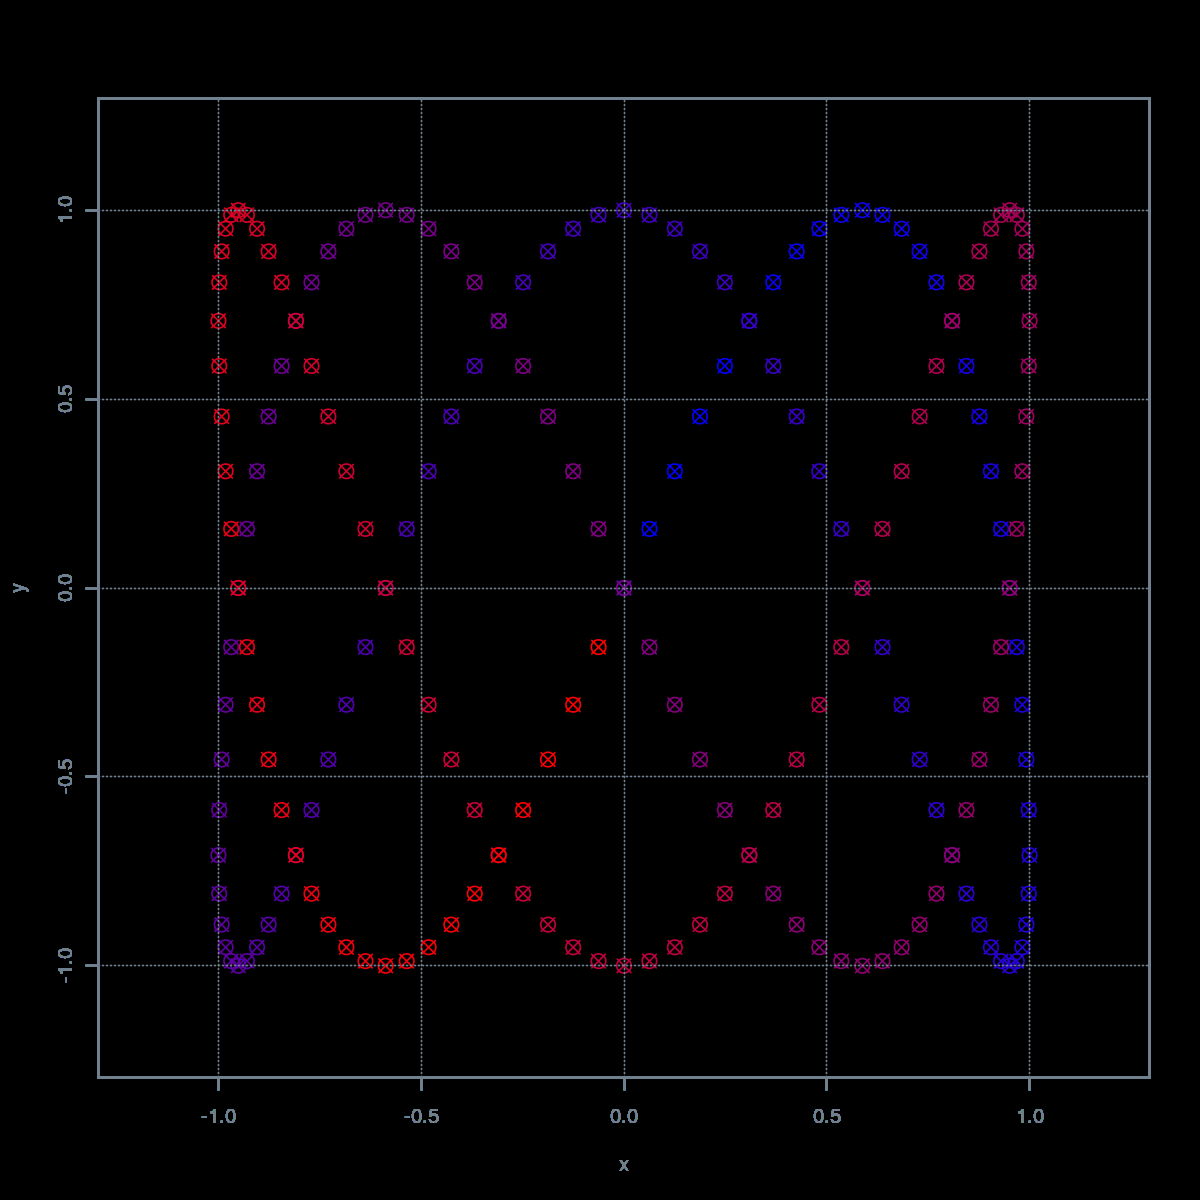

In [16]:
#unlock for running in SageMathCell
T<-seq(from=0,to=2*pi,by=.01*pi)
col<-function(i) {rgb(.005*i,0,1-.005*i)}
curve<-function(t) {list(sin(2*t),sin(5*t))}
X<-sapply(T,curve)[1,]; Y<-sapply(T,curve)[2,] 
#svg(filename='Rplots.svg',onefile=TRUE,width=10,height=10,
#    pointsize=12,family='times',bg='black',
#    antialias=c('default','none','gray','subpixel'))
options(repr.plot.width=10,repr.plot.height=10,
        repr.plot.bg='black')
c0<-'slategray'
for(i in 1:200){
    plot(X[i],Y[i],pch=13,cex=1.5,
         xlim=c(-1.2,1.2),ylim=c(-1.2,1.2),
         col=col(i),xlab='x',ylab='y',
        fg=c0,col.axis=c0,col.lab=c0)
    par(new=TRUE)}
grid(col=c0)
#dev.off()

In [17]:
shtml<-'<div style="border:10px double white; 
                    width:620px; height:920px; overflow:auto; 
                    padding:10px; background-color:ghostwhite">
<iframe src="https://olgabelitskaya.github.io/kaggle_smc/kaggle_smc2.html" 
        width="99%" height="99%"/></div>'
display_html(shtml)